In [13]:
import numpy as np
import pickle
from plotnine import *
import pandas as pd
import os
main_dir=os.getcwd()
results_dir = main_dir +"/results/sobolSEB/8wet10/"
clonamesAll = ["maxTil" ,"firstTil","delayTil" ,"maxB","firstB","delayB",
                 "delayLat","delayNGStart","delayNGEnd",
        "lar0", "lbr0", "lnr0", "lmaxr0", "rr0", "ar0", "tropismNr0", "tropismSr0", "thetar0",
        "lar1", "lbr1", "lnr1", "lmaxr1", "rr1", "ar1", "tropismNr1", "tropismSr1", "thetar1",
        "lar2", "lbr2", "lnr2", "lmaxr2", "rr2", "ar2", "tropismNr2", "tropismSr2", "thetar2",
        "last", "lbst", "lnst", "lmaxst", "rst", "ast", "tropismNst", "tropismSst", "thetast",
         "lmaxle", "rle", "ale", "tropismNle", "tropismSle", "thetale","Width_petiole","Width_blade",
                "areaMax"]

In [14]:
def getData(simDuration, condition,data,reps):
    addToName =   repr(reps)+"_"+repr(simDuration)+"_"+condition
    with open(results_dir + data+'_R'+addToName+'.pkl','rb') as f:
        allS = pickle.load(f)
        Siev = allS['ST']
        Sievconf = allS['ST_conf']
    df = pd.DataFrame(np.array([Siev]), columns =clonamesAll)
    df_conf = pd.DataFrame(np.array([Sievconf]), columns =clonamesAll)
    dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
    dfmean["maxst"] = (df + df_conf).max()
    dfmean["minst"] = (df - df_conf).min()
    dfmean['variables']=dfmean.index
    dfmeanEv21w = dfmean
    if condition == "wet":
        dfmeanEv21w['condition'] = "wetter&colder"
    else:
        dfmeanEv21w['condition'] = "drier&warmer"
    dfmeanEv21w['simDuration'] =str(simDuration)+ "d"
    
    dfmeanEv21w["variable"] = data
    return dfmeanEv21w
    


In [20]:
def getAllvar(simDuration, condition,reps):
    df_ =[]
    for data_ in ["Ytrans","Yassi","Ygrs","Ywue","YIwue"]:
        df_.append( getData(simDuration, condition,data_,reps))
    return pd.concat(df_)

In [21]:
dfYW = getAllvar(10, "wet",8)

/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/facets/facet.py:440: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'
/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_errorbar : Removed 60 rows containing missing values.


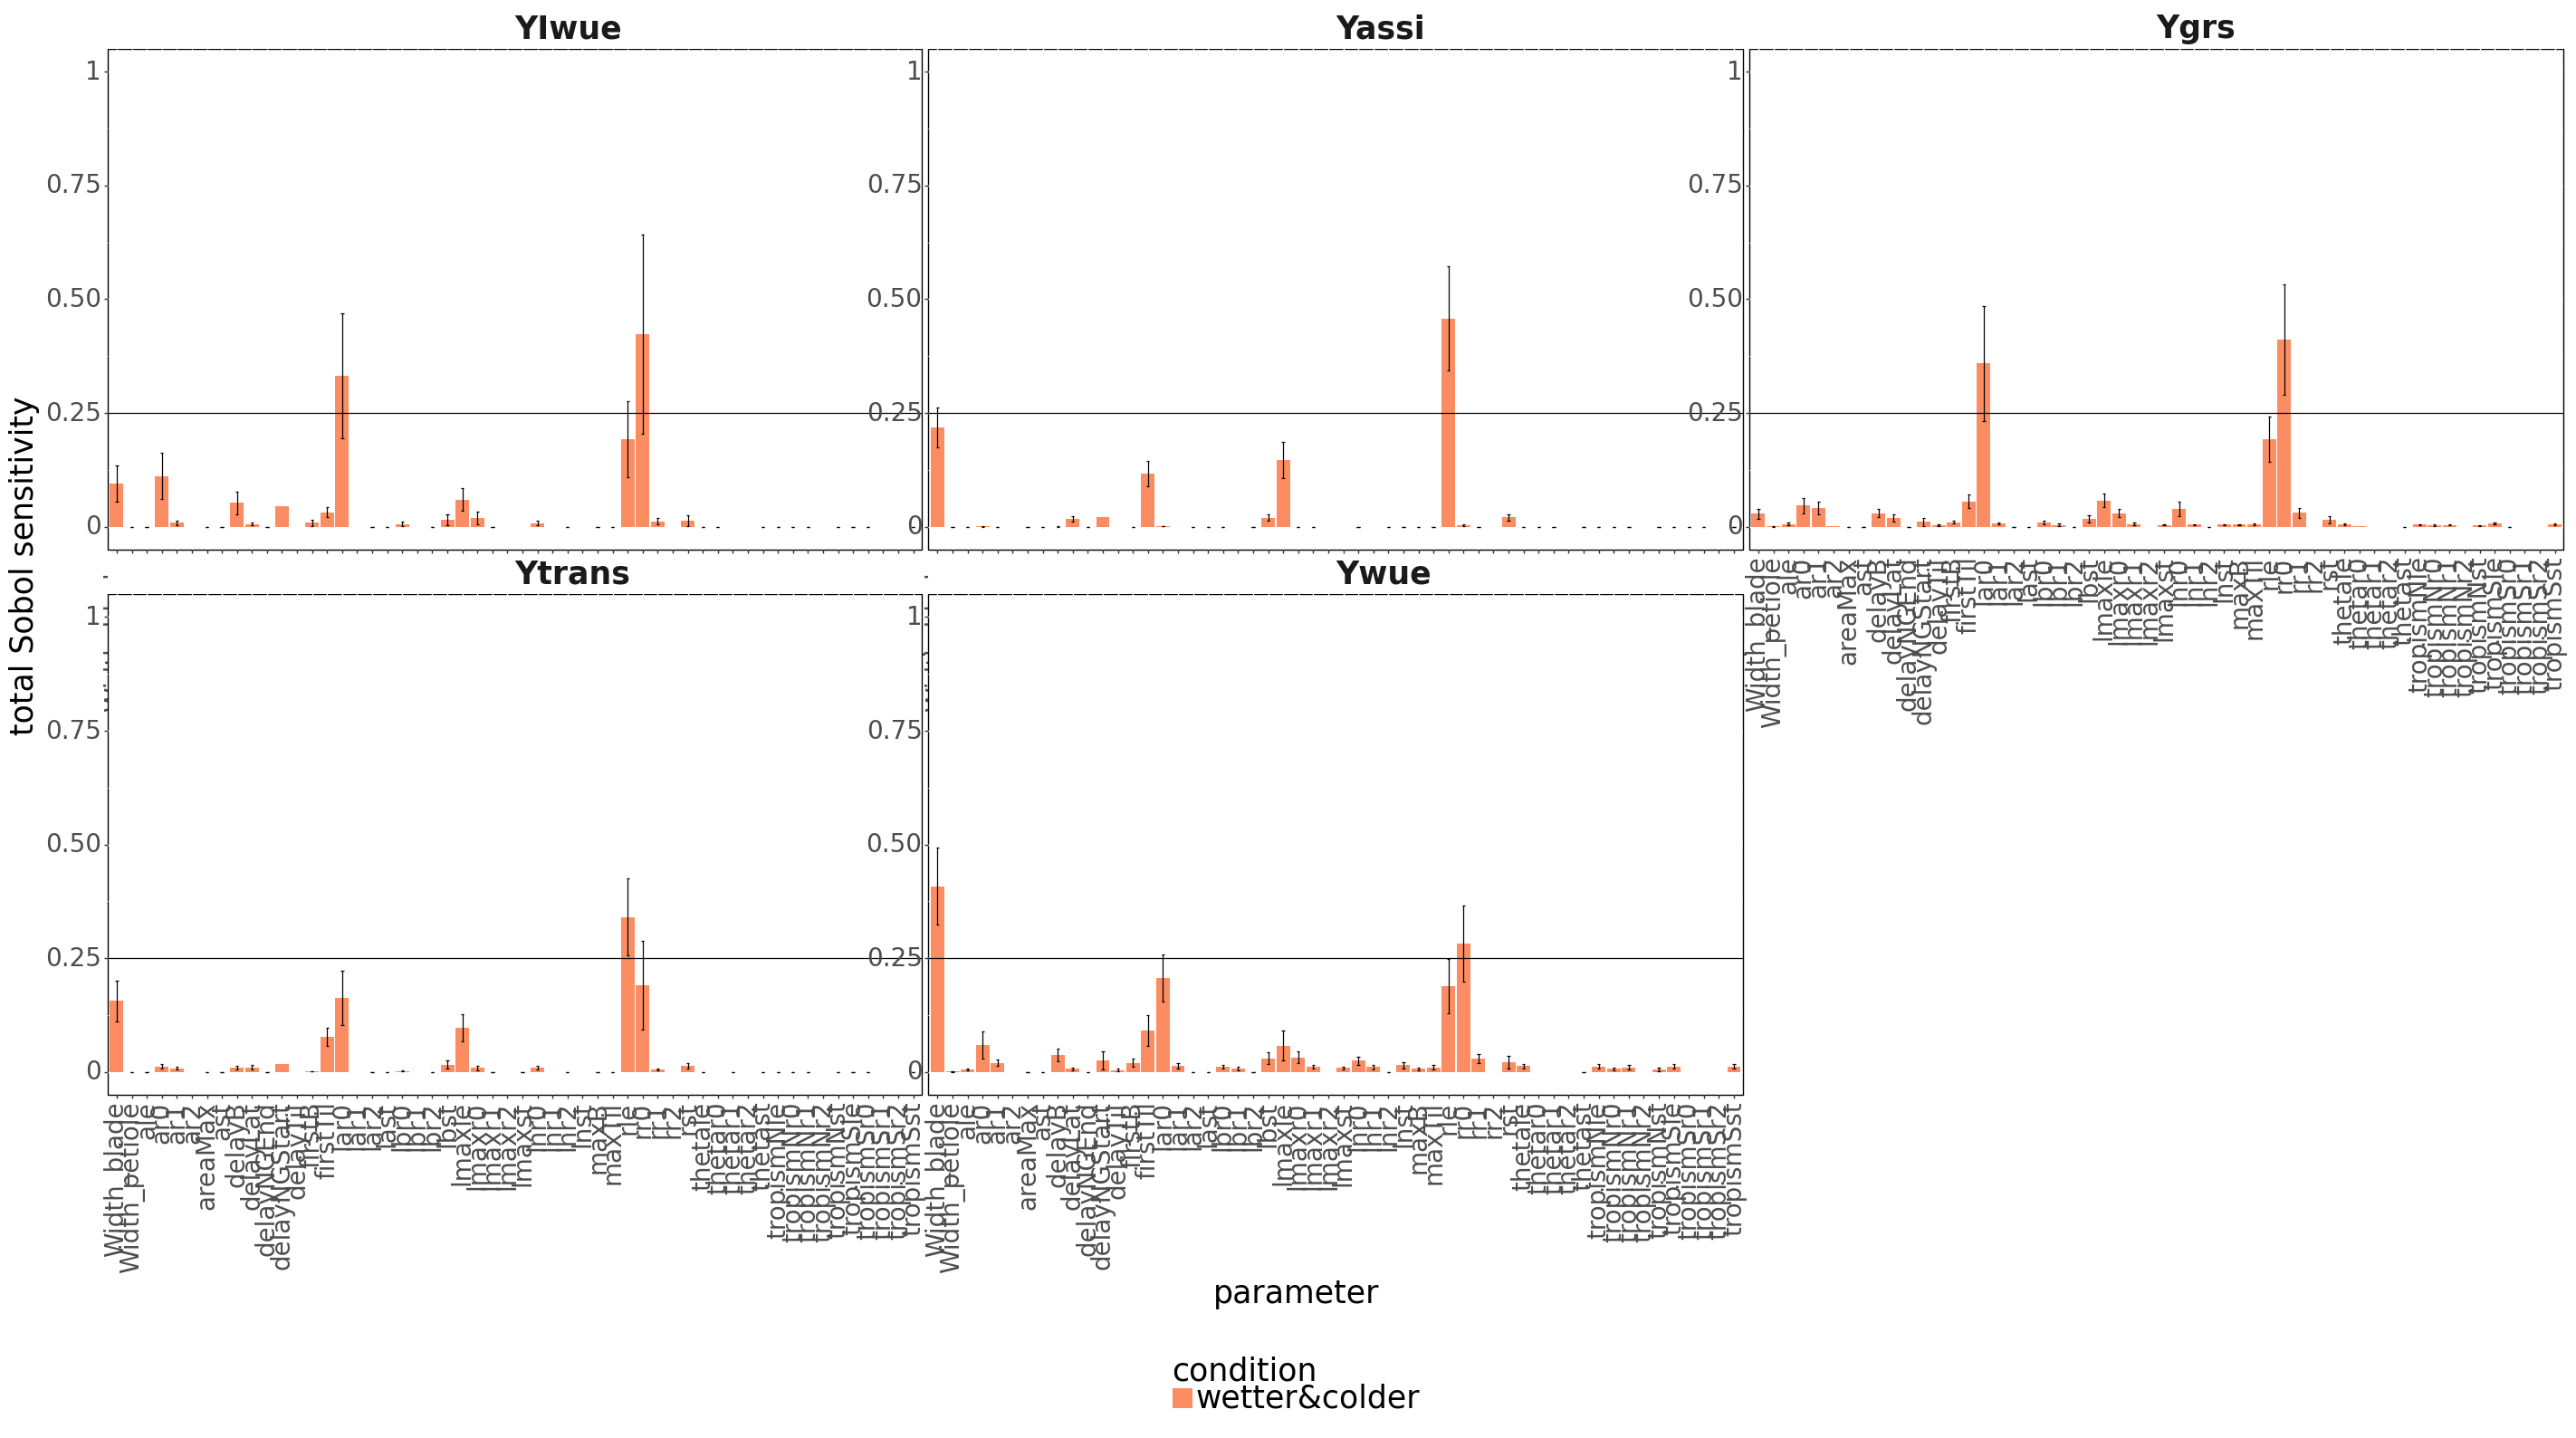

<ggplot: (8767770515369)>

In [24]:

from plotnine import options
for dataType in dataTypes:
    options.figure_size = (35, 15)
    (
        ggplot(dfYW.loc[dfYW['Percentage'] > 80])  # What data to use
        + aes(x='variables', y= "mean",  fill="condition" )  # What variable to use
        + geom_bar(stat = "identity",position=position_dodge(width=1))  # Geometric object to use for drawing
        + xlab("parameter")
        + ylim(0,1)
        + facet_wrap("variable", scales = "free")
        + geom_errorbar(aes(ymin="minst", ymax="maxst"),position=position_dodge(width=1),width=.2) 
        + ylab("total Sobol sensitivity")
        + scale_fill_manual(name="",
                         values = ["#FC8D62","#8DA0CB"])
         + geom_hline(aes(yintercept=0.25))

        +theme(legend_text = element_text( size=25),
            legend_title = element_text( size=25),
            panel_border = element_rect(color = "black", fill = "white", size = 1), 
            legend_position= [0.5,-0.1],
            #legend.direction = "horizontal",
            legend_box = "vertical",
            panel_grid_minor = element_line(colour="white"),
            panel_grid_major = element_line(colour="white"),
            panel_background = element_rect(fill="white", color="black"),
            strip_text_y =element_text( size=25) ,
            axis_text_x =element_text(angle = 90, size=20) ,
            axis_text = element_text( size=20),
            axis_title = element_text( size=25),
            strip_background = element_rect(fill="white"),
            strip_text = element_text(size = 25, hjust = 0,face ="bold")) 
    )

In [2]:
import pickle
with open('rep6allAll.pkl','rb') as f:
    dfYW = pickle.load(f)

In [21]:
dfYW

,mean,maxst,minst,variables,condition,simDuration,variable
maxTil,1.990305e-09,3.039683e-09,9.409269e-10,maxTil,wetter&colder,10d,Ytrans
firstTil,6.546733e-02,8.575329e-02,4.518136e-02,firstTil,wetter&colder,10d,Ytrans
delayTil,2.392952e-11,6.494013e-11,-1.708109e-11,delayTil,wetter&colder,10d,Ytrans
maxB,4.823018e-09,6.657754e-09,2.988282e-09,maxB,wetter&colder,10d,Ytrans
firstB,1.235111e-03,1.652633e-03,8.175876e-04,firstB,wetter&colder,10d,Ytrans
...,...,...,...,...,...,...,...
kx_st,0.000000e+00,0.000000e+00,0.000000e+00,kx_st,drier&warmer,20d,YIwue
kr_st,0.000000e+00,0.000000e+00,0.000000e+00,kr_st,drier&warmer,20d,YIwue
Across,0.000000e+00,0.000000e+00,0.000000e+00,Across,drier&warmer,20d,YIwue
krm2,0.000000e+00,0.000000e+00,0.000000e+00,krm2,drier&warmer,20d,YIwue


In [3]:
import numpy as np


In [7]:
dfYW.loc[(dfYW['variable'] == 'Ywue') & (dfYW['simDuration'] == '20d')]

,mean,maxst,minst,variables,condition,simDuration,variable
maxTil,0.001218,0.002583,-0.000146,maxTil,wetter&colder,20d,Ywue
firstTil,0.010847,0.017551,0.004143,firstTil,wetter&colder,20d,Ywue
delayTil,0.005449,0.009534,0.001363,delayTil,wetter&colder,20d,Ywue
maxB,0.001140,0.001622,0.000658,maxB,wetter&colder,20d,Ywue
firstB,0.003485,0.005178,0.001792,firstB,wetter&colder,20d,Ywue
...,...,...,...,...,...,...,...
kx_st,0.001559,0.004078,-0.000959,kx_st,drier&warmer,20d,Ywue
kr_st,0.009635,0.015117,0.004153,kr_st,drier&warmer,20d,Ywue
Across,0.000270,0.000575,-0.000034,Across,drier&warmer,20d,Ywue
krm2,0.000004,0.000009,-0.000001,krm2,drier&warmer,20d,Ywue


In [15]:

from plotnine import *
from plotnine import options

from plotnine import *
from plotnine import options
#for dataType in np.unique(dfYW['variable']):
dataType='Ywue'
print(dataType)
options.figure_size = (70, 30)
fig, plot = (
    ggplot(dfYW.loc[(dfYW['variable'] == dataType)&(dfYW['simDuration'] == '20d')])  # What data to use
    + aes(x='variables', y= "mean",  fill="condition" )  # What variable to use
    + geom_bar(stat = "identity",position=position_dodge(width=1))  # Geometric object to use for drawing
    + xlab("parameter")
    + ylim(0,0.65)
    #+ facet_grid("simDuration~variable", scales = "free", space = "free")
    #+ facet_wrap("simDuration", scales = "free")
    + geom_errorbar(aes(ymin="minst", ymax="maxst"),position=position_dodge(width=1),width=.2) 
    + ylab("total Sobol sensitivity")
    + scale_fill_manual(name="",
                     values = ["#FC8D62","#8DA0CB"])
     + geom_hline(aes(yintercept=0.25))

    +theme(legend_text = element_text( size=30),
        legend_title = element_text( size=30),
        panel_border = element_rect(color = "black", fill = "white", size = 1), 
        legend_position= [0.7,0.7],
        #legend_direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=30) ,
        axis_text_x =element_text(angle = 90, size=30) ,
        axis_text = element_text( size=30),
        axis_title = element_text( size=40),
        strip_background = element_rect(fill="white"),
        strip_text = element_text(size = 25, hjust = 0,face ="bold")) 
).draw(show=False, return_ggplot=True)
fig.savefig('seb2023_20d'+dataType+'.png', dpi=300)

Ywue


/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_errorbar : Removed 74 rows containing missing values.


In [28]:
import pickle
with open('rep6allfunctional.pkl','rb') as f:
    dfYW = pickle.load(f)

In [29]:

from plotnine import *
from plotnine import options
for dataType in np.unique(dfYW['variable']):
    print(dataType)
    options.figure_size = (70, 30)
    fig, plot = (
        ggplot(dfYW.loc[dfYW['variable'] == dataType])  # What data to use
        + aes(x='variables', y= "mean",  fill="condition",  colour="simDuration" )  # What variable to use
        + geom_bar(stat = "identity",position=position_dodge(width=1))  # Geometric object to use for drawing
        + xlab("parameter")
        + ylim(0,1)
        #+ facet_grid("simDuration~variable", scales = "free", space = "free")
        + facet_wrap("simDuration", scales = "free")
        + geom_errorbar(aes(ymin="minst", ymax="maxst"),position=position_dodge(width=1),width=.2) 
        + ylab("total Sobol sensitivity")
        + scale_fill_manual(name="",
                         values = ["#FC8D62","#8DA0CB"])
         + geom_hline(aes(yintercept=0.25))

        +theme(legend_text = element_text( size=25),
            legend_title = element_text( size=25),
            panel_border = element_rect(color = "black", fill = "white", size = 1), 
            #legend_position= [0.5,0.1],
            legend_direction = "horizontal",
            legend_box = "vertical",
            panel_grid_minor = element_line(colour="white"),
            panel_grid_major = element_line(colour="white"),
            panel_background = element_rect(fill="white", color="black"),
            strip_text_y =element_text( size=25) ,
            axis_text_x =element_text(angle = 90, size=20) ,
            axis_text = element_text( size=20),
            axis_title = element_text( size=25),
            strip_background = element_rect(fill="white"),
            strip_text = element_text(size = 25, hjust = 0,face ="bold")) 
    ).draw(show=False, return_ggplot=True)
    fig.savefig('seb2023'+dataType+'F.png', dpi=300)

YIwue


/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_errorbar : Removed 1 rows containing missing values.


Yassi


/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_errorbar : Removed 1 rows containing missing values.


Ygrs


/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_errorbar : Removed 3 rows containing missing values.


Ytrans


/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_errorbar : Removed 2 rows containing missing values.


Ywue


/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_errorbar : Removed 6 rows containing missing values.


In [66]:
dftev = getAll4var("Ytrans","","",[12,12,12,12])
dftag = getAll4var("Yassi","","",[12,12,12,12])
dftgr = getAll4var("Ygrs","","",[8,8,8,8])

 8 wet Siev 12
 8 dry Siev 12
 21 wet Siev 12
 21 dry Siev 12
 8 wet Siag 12
 8 dry Siag 12
 21 wet Siag 12
 21 dry Siag 12
 8 wet Sigr 8
 8 dry Sigr 8
 21 wet Sigr 8
 21 dry Sigr 8


In [67]:
df3['simDuration']

Chl             11d
oi              11d
fw1r            11d
k_fw1           11d
ψ_t,crit,1      11d
               ... 
k_r,st          18d
Across          18d
km2             18d
km1             18d
r_st,max,org    18d
Name: simDuration, Length: 200, dtype: category
Categories (2, object): ['11d', '18d']

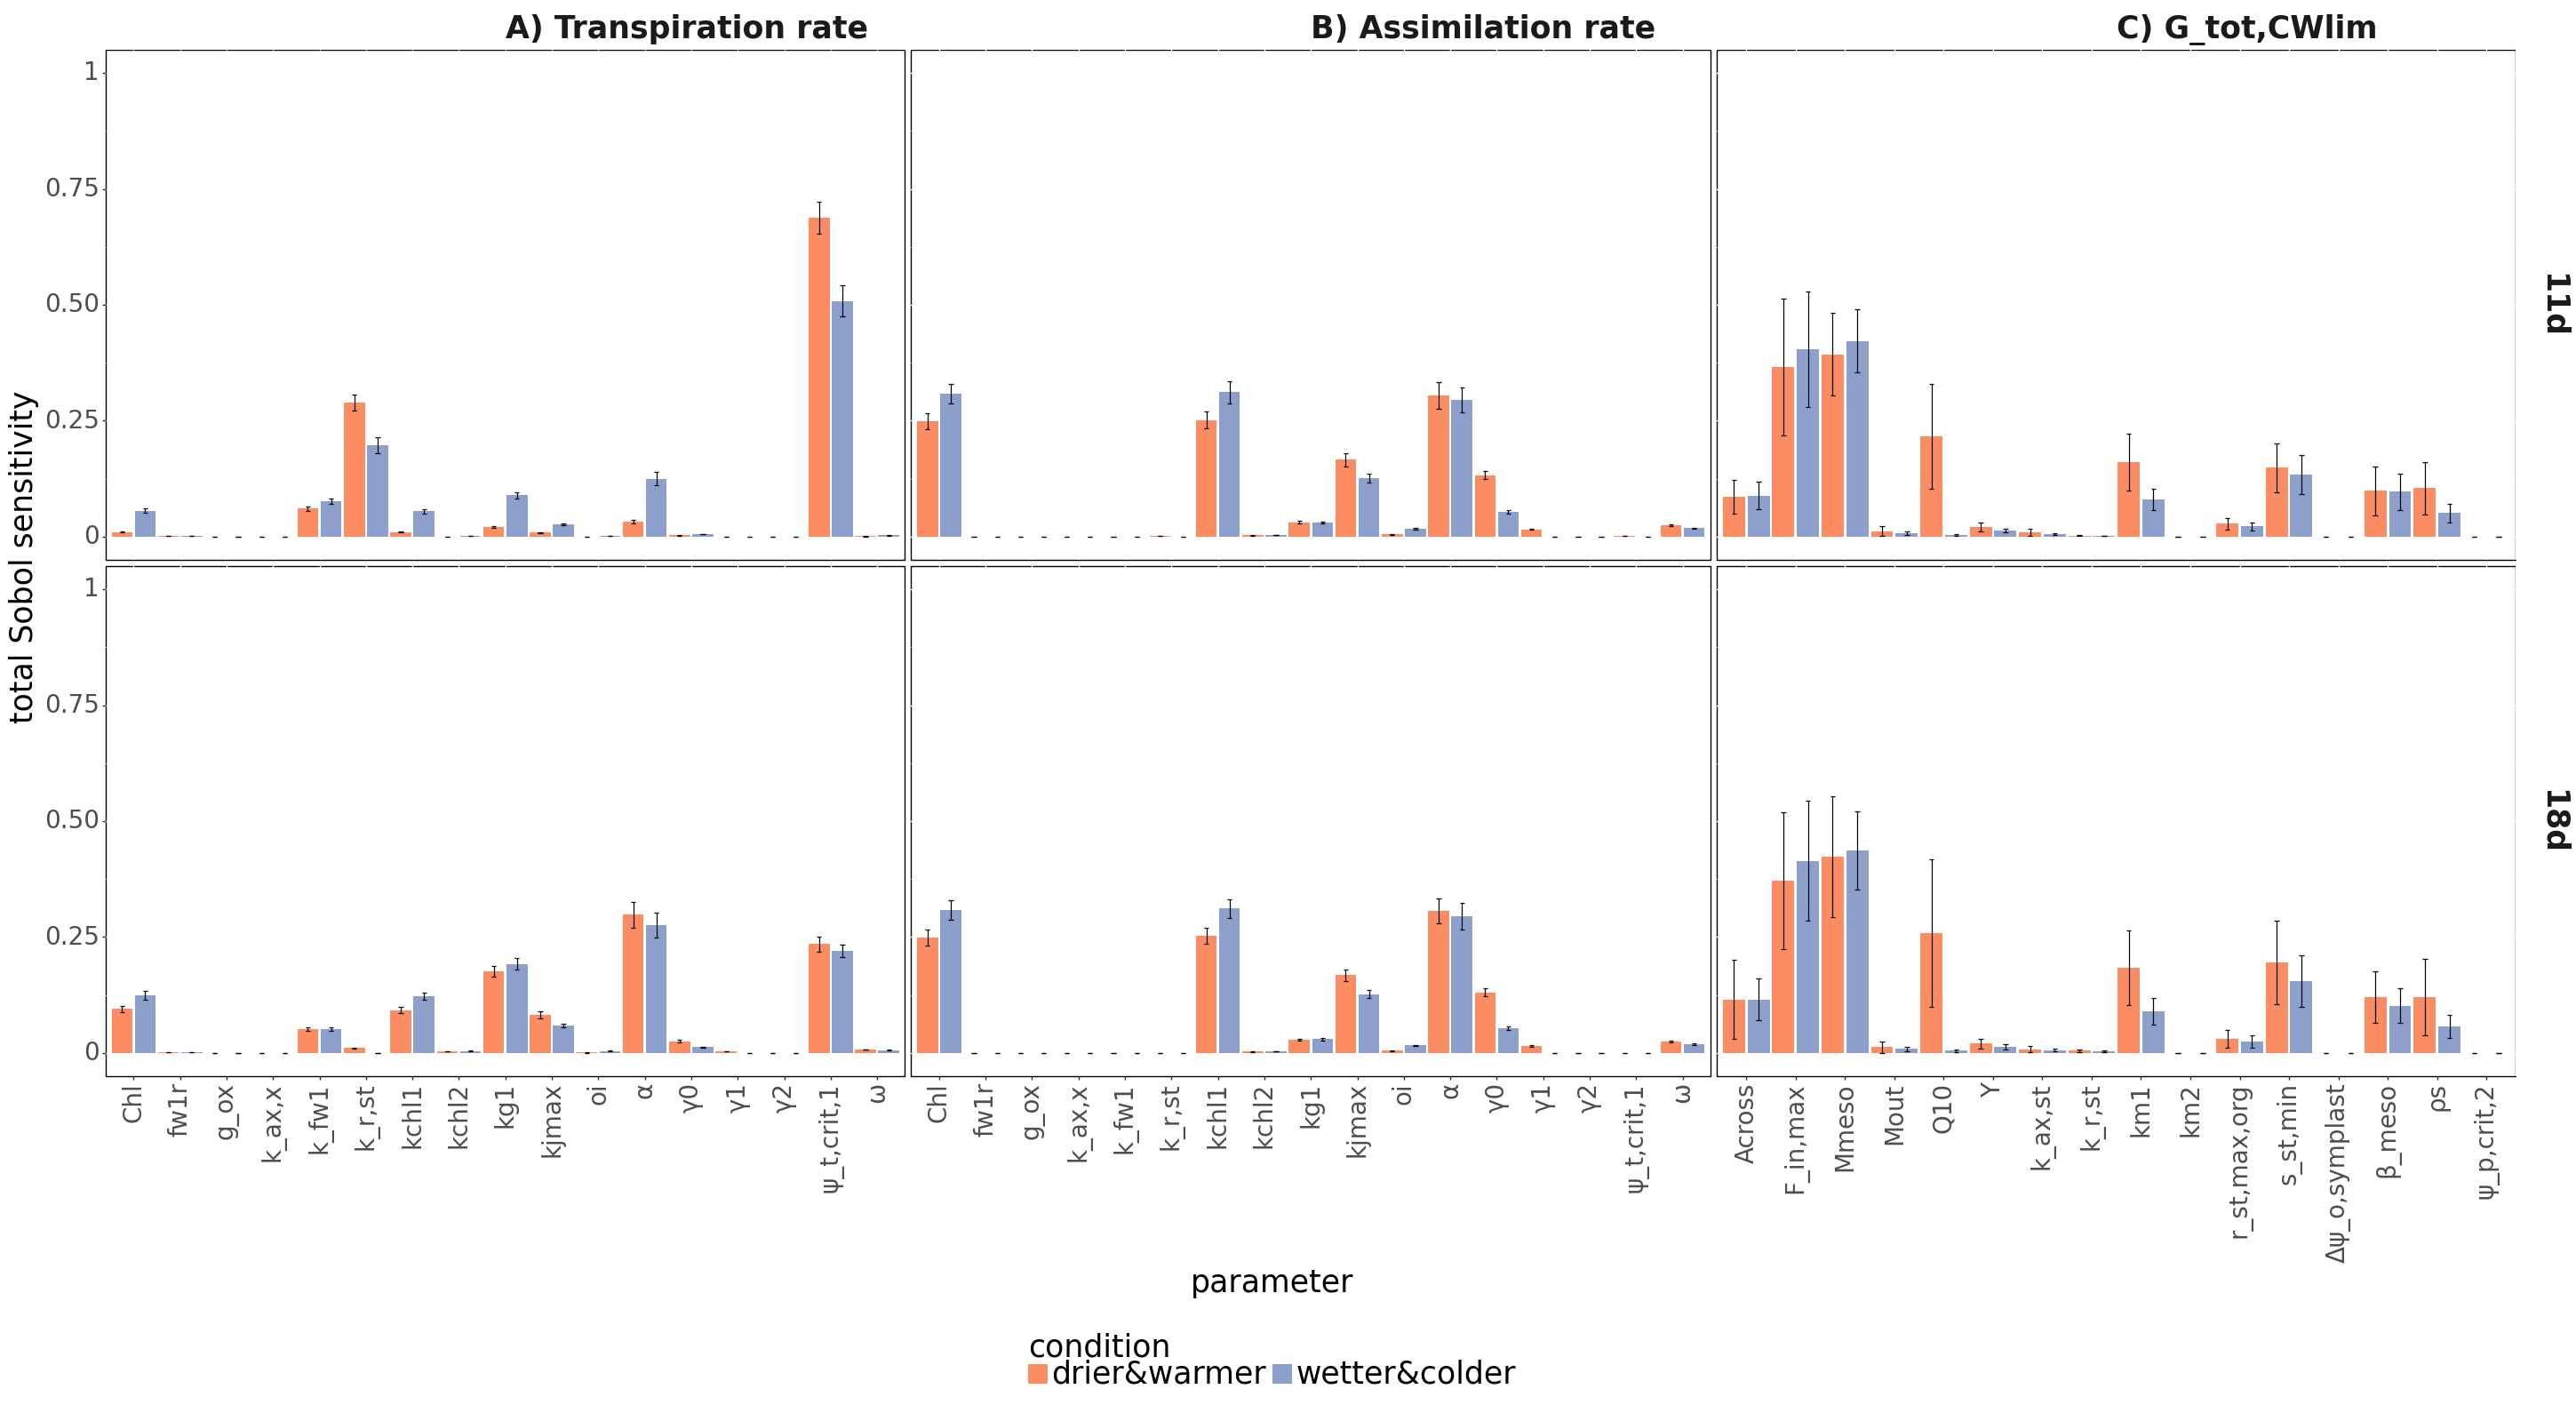

<ggplot: (8735780576269)>

In [68]:
df3 = pd.concat([dftev, dftag,dftgr])

df3['simDuration'] = df3['simDuration'].astype('category')
df3['simDuration'] = df3['simDuration'].cat.reorder_categories(['11d', '18d'])

from plotnine import options
options.figure_size = (35, 15)
(
    ggplot(df3)  # What data to use
    + aes(x='variables', y= "mean",  fill="condition" )  # What variable to use
    + geom_bar(stat = "identity",position=position_dodge(width=1))  # Geometric object to use for drawing
    + xlab("parameter")
    + ylim(0,1)
    + facet_grid("simDuration~variable", scales = "free", space = "free")
    + geom_errorbar(aes(ymin="minst", ymax="maxst"),position=position_dodge(width=1),width=.2) 
    + ylab("total Sobol sensitivity")
    + scale_fill_manual(name="",
                     values = ["#FC8D62","#8DA0CB"])
    
    +theme(legend_text = element_text( size=25),
        legend_title = element_text( size=25),
        panel_border = element_rect(color = "black", fill = "white", size = 1), 
        legend_position= [0.5,-0.1],
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=25) ,
        axis_text_x =element_text(angle = 90, size=20) ,
        axis_text = element_text( size=20),
        axis_title = element_text( size=25),
        strip_background = element_rect(fill="white"),
        strip_text = element_text(size = 25, hjust = 0,face ="bold")) 
)

In [16]:
print('\N{GREEK SMALL LETTER PI}r\N{SUPERSCRIPT TWO}')
print('k\u2090')

πr²
kₐ


/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_errorbar : Removed 1 rows containing missing values.
/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/guides/guides.py:187: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


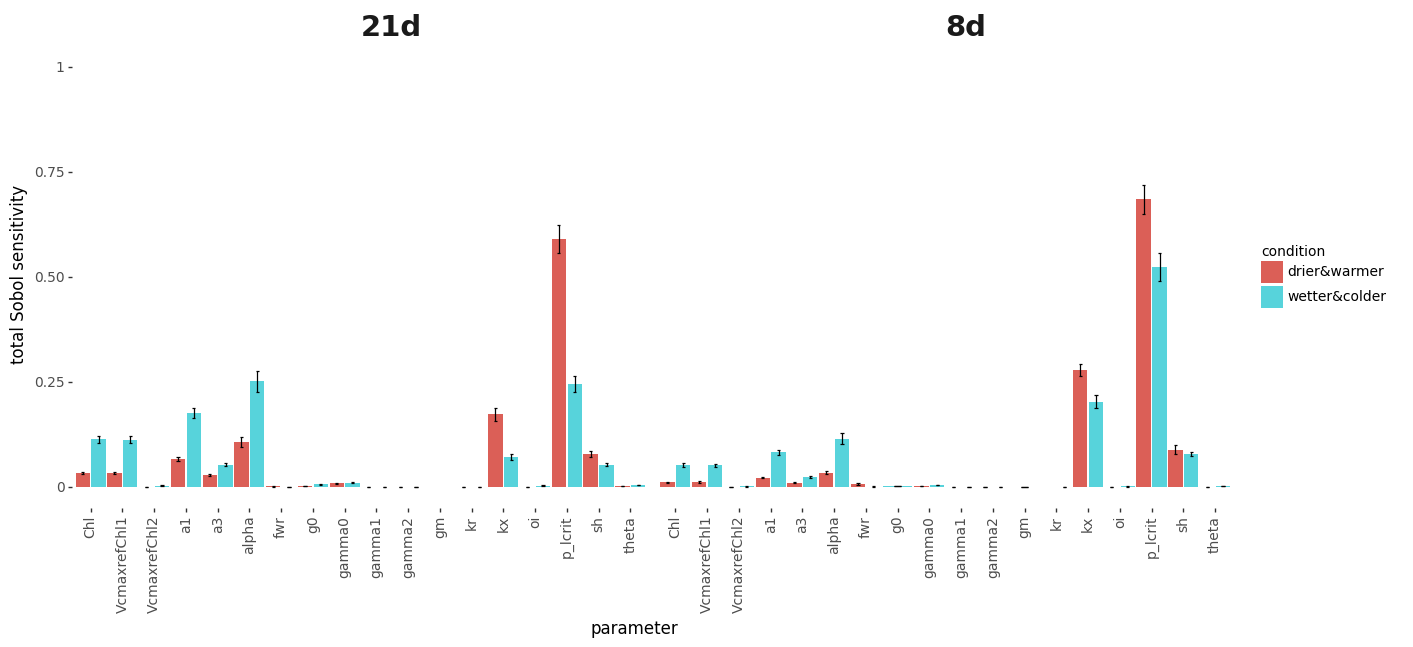

<ggplot: (8735778246870)>

In [23]:

addToName = repr(12)+"_"+repr(18)+"_"+"wet"
with open('sobolPhoto4/Siev_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
df
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv21w = dfmean
dfmeanEv21w['simDuration'] = "21d"
dfmeanEv21w['condition'] = "wetter&colder"

addToName = repr(12)+"_"+repr(18)+"_"+"dry"
with open('sobolPhoto4/Siev_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
df
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv21d = dfmean
dfmeanEv21d['simDuration'] = "21d"
dfmeanEv21d['condition'] = "drier&warmer"


addToName = repr(12)+"_"+repr(11)+"_"+"wet"
with open('sobolPhoto4/Siev_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
df
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv7w = dfmean
dfmeanEv7w['simDuration'] = "8d"
dfmeanEv7w['condition'] = "wetter&colder"


addToName = repr(12)+"_"+repr(11)+"_"+"dry"
with open('sobolPhoto4/Siev_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','gm',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','gm',
             'kr','kx'])
df
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv7d = dfmean
dfmeanEv7d['simDuration'] = "8d"
dfmeanEv7d['condition'] = "drier&warmer" #"drier&warmer","wetter&colder"

df3 = pd.concat([dfmeanEv21w, dfmeanEv21d,dfmeanEv7w,dfmeanEv7d])
from plotnine import options
options.figure_size = (15, 6)
(
    ggplot(df3)  # What data to use
    + aes(x='variables', y= "mean",  fill="condition" )  # What variable to use
    + geom_bar(stat = "identity",position=position_dodge(width=1))  # Geometric object to use for drawing
    + xlab("parameter")
    + ylim(0,1)
    + facet_wrap("simDuration")
    + geom_errorbar(aes(ymin="minst", ymax="maxst"),position=position_dodge(width=1),width=.2) 
    + ylab("total Sobol sensitivity")
    + scale_color_manual(name="",
                     values = ["#8DA0CB","#FC8D62"])
    
    +theme(legend_text = element_text( size=10),
        legend_title = element_text( size=10),
        #legend_position="bottom",#c(0.5,0.1),
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=10) ,
        axis_text_x =element_text(angle = 90, size=10) ,
        axis_text = element_text( size=10),
        axis_title = element_text( size=12),
        strip_background = element_rect(fill="white"),
        strip_text = element_text(size = 21, hjust = 0,face ="bold")) 
)
#,strip_placement = "inside"

/tmp/ipykernel_60/2803912311.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


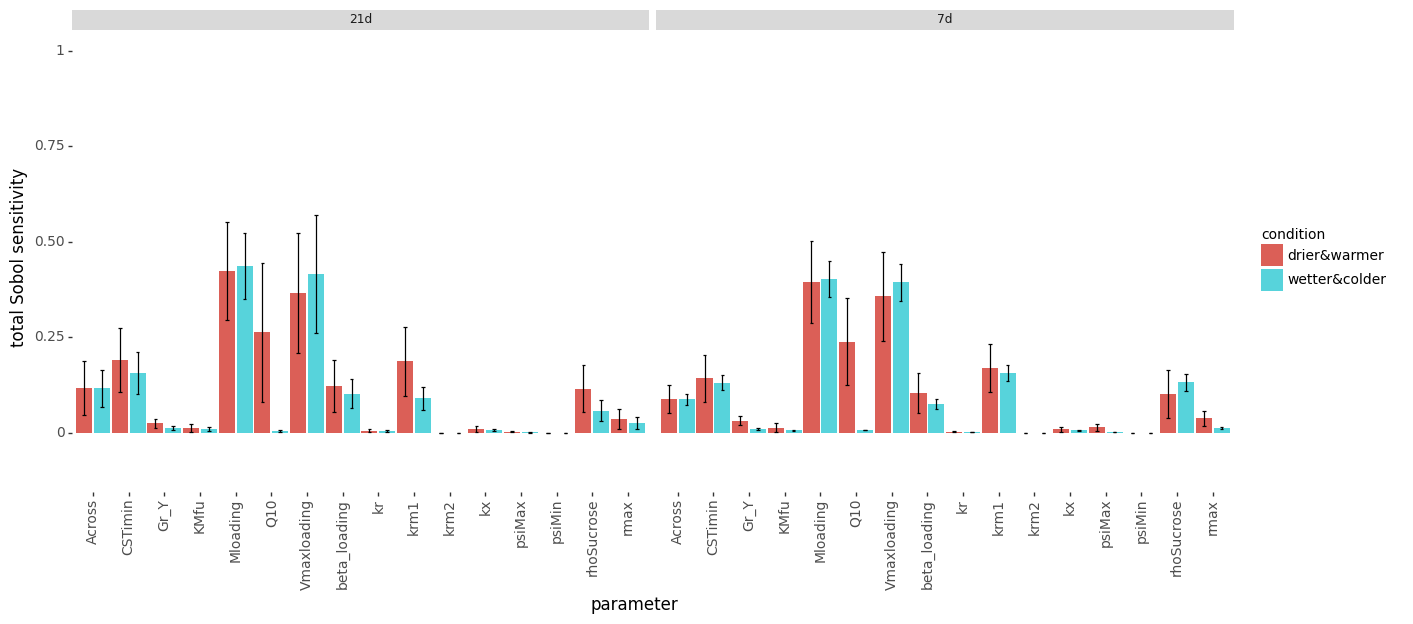

<ggplot: (8735778010447)>

In [26]:
#"wetter&colder"
addToName = repr(8)+"_"+repr(18)+"_"+"wet"
with open('sobolPhlo4/Sigr_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Q10','psiMax','psiMin','KMfu','Vmaxloading','CSTimin',
                  'beta_loading', 'Mloading','Gr_Y','rhoSucrose',
                 'kx','kr','Across','krm2','krm1','rmax'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Q10','psiMax','psiMin','KMfu','Vmaxloading','CSTimin',
                  'beta_loading', 'Mloading','Gr_Y','rhoSucrose',
                 'kx','kr','Across','krm2','krm1','rmax'])
df
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv21w = dfmean
dfmeanEv21w['simDuration'] = "21d"
dfmeanEv21w['condition'] = "wetter&colder"

addToName = repr(8)+"_"+repr(18)+"_"+"dry"
with open('sobolPhlo4/Sigr_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Q10','psiMax','psiMin','KMfu','Vmaxloading','CSTimin',
                  'beta_loading', 'Mloading','Gr_Y','rhoSucrose',
                 'kx','kr','Across','krm2','krm1','rmax'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Q10','psiMax','psiMin','KMfu','Vmaxloading','CSTimin',
                  'beta_loading', 'Mloading','Gr_Y','rhoSucrose',
                 'kx','kr','Across','krm2','krm1','rmax'])
df
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv21d = dfmean
dfmeanEv21d['simDuration'] = "21d"
dfmeanEv21d['condition'] = "drier&warmer"


addToName = repr(11)+"_"+repr(8)+"_"+"wet"
with open('sobolPhlo4/Sigr_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Q10','psiMax','psiMin','KMfu','Vmaxloading','CSTimin',
                  'beta_loading', 'Mloading','Gr_Y','rhoSucrose',
                 'kx','kr','Across','krm2','krm1','rmax'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Q10','psiMax','psiMin','KMfu','Vmaxloading','CSTimin',
                  'beta_loading', 'Mloading','Gr_Y','rhoSucrose',
                 'kx','kr','Across','krm2','krm1','rmax'])
df
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv7w = dfmean
dfmeanEv7w['simDuration'] = "7d"
dfmeanEv7w['condition'] = "wetter&colder"


addToName = repr(8)+"_"+repr(11)+"_"+"dry"
with open('sobolPhlo4/Sigr_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Q10','psiMax','psiMin','KMfu','Vmaxloading','CSTimin',
                  'beta_loading', 'Mloading','Gr_Y','rhoSucrose',
                 'kx','kr','Across','krm2','krm1','rmax'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Q10','psiMax','psiMin','KMfu','Vmaxloading','CSTimin',
                  'beta_loading', 'Mloading','Gr_Y','rhoSucrose',
                 'kx','kr','Across','krm2','krm1','rmax'])
df
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv7d = dfmean
dfmeanEv7d['simDuration'] = "7d"
dfmeanEv7d['condition'] = "drier&warmer"

df3 = pd.concat([dfmeanEv21w, dfmeanEv21d,dfmeanEv7w,dfmeanEv7d])

df3[df3["minst"]<0]["minst"]=0
from plotnine import options
options.figure_size = (15, 6)
(
    ggplot(df3)  # What data to use
    + aes(x='variables', y= "mean",  fill="condition" )  # What variable to use
    + geom_bar(stat = "identity",position=position_dodge(width=1))  # Geometric object to use for drawing
    + xlab("parameter")
    + ylim(-0.1,1)
    + facet_wrap("simDuration")
    + geom_errorbar(aes(ymin="minst", ymax="maxst"),position=position_dodge(width=1),width=.2) 
    + ylab("total Sobol sensitivity")
    
    +theme(legend_text = element_text( size=10),
        legend_title = element_text( size=10),
        #legend_position="bottom",#c(0.5,0.1),
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=10) ,
        axis_text_x =element_text(angle = 90, size=10) ,
        axis_text = element_text( size=10),
        axis_title = element_text( size=12)) 
)

In [84]:
df4 = df3
df4[df4["minst"]<0]["minst"]

psiMax   -2.198969e-04
psiMin   -5.729747e-05
psiMax   -8.756242e-05
kr       -6.355252e-05
rmax     -2.053915e-02
Gr_Y     -2.733745e-19
Name: minst, dtype: float64

/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_errorbar : Removed 6 rows containing missing values.


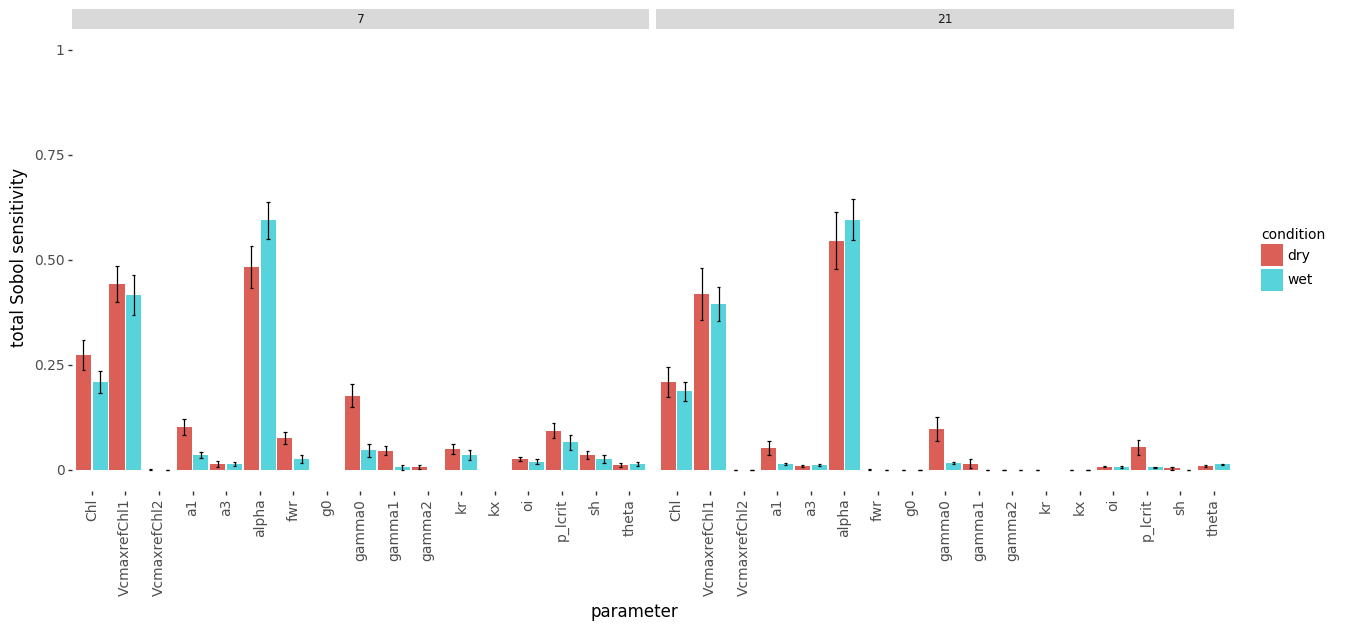

<ggplot: (8732985057699)>

In [38]:


addToName = repr(11)+"_"+repr(21)+"_"+"wet"
with open('sobolPhoto4/Siag_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
df
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv21w = dfmean
dfmeanEv12w['simDuration'] = "21d"
dfmeanEv21w['condition'] = "wetter&colder"

addToName = repr(10)+"_"+repr(21)+"_"+"dry"
with open('sobolPhoto4/Siag_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
df
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv21d = dfmean
dfmeanEv12d['simDuration'] = "21d"
dfmeanEv21d['condition'] = "drier&warmer"


addToName = repr(11)+"_"+repr(7)+"_"+"wet"
with open('sobolPhoto4/Siag_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
df
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv7w = dfmean
dfmeanEv7w['simDuration'] = "7d"
dfmeanEv7w['condition'] ="wetter&colder"


addToName = repr(11)+"_"+repr(7)+"_"+"dry"
with open('sobolPhoto4/Siag_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
df
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv7d = dfmean
dfmeanEv7d['simDuration'] = "7d"
dfmeanEv7d['condition'] = "drier&warmer"

df3 = pd.concat([dfmeanEv21w, dfmeanEv21d,dfmeanEv7w,dfmeanEv7d])

NameError: name 'dfmeanEv12w' is not defined

/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_errorbar : Removed 6 rows containing missing values.


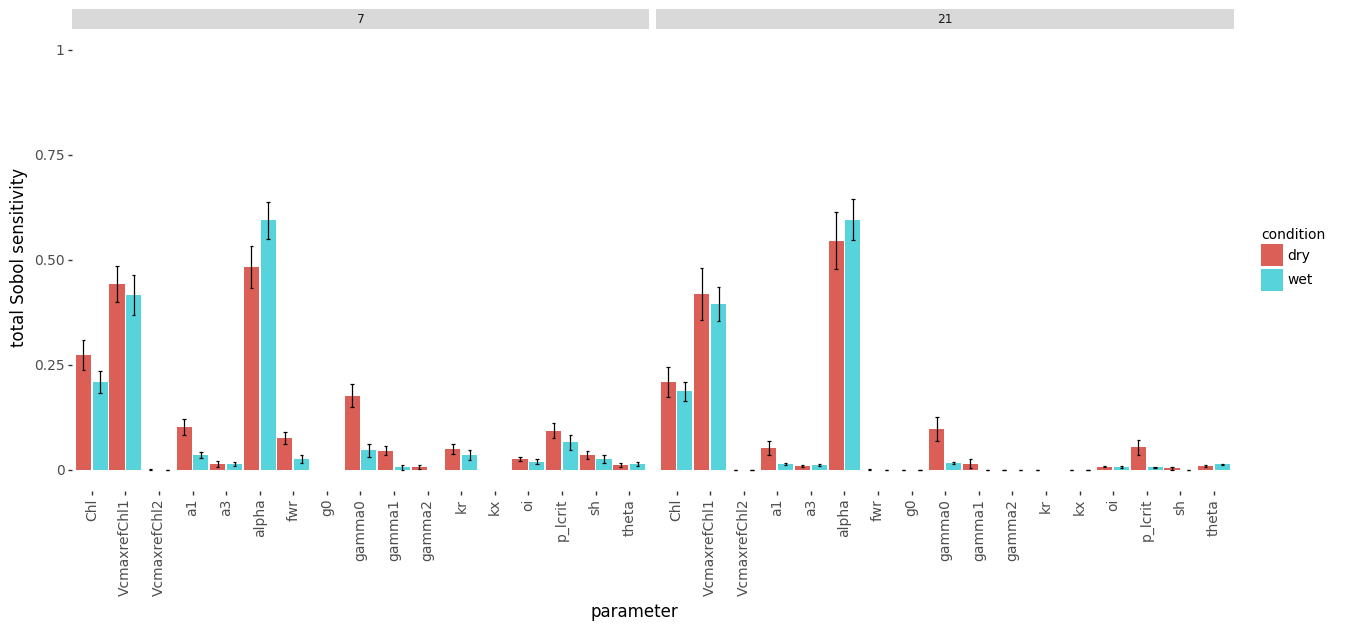

<ggplot: (8732984870440)>

In [64]:
options.figure_size = (15, 6)
(
    ggplot(df3)  # What data to use
    + aes(x='variables', y= "mean",  fill="condition" )  # What variable to use
    + geom_bar(stat = "identity",position=position_dodge(width=1))  # Geometric object to use for drawing
    + xlab("parameter")
    + ylim(0,1)
    + facet_wrap("simDuration")
    + geom_errorbar(aes(ymin="minst", ymax="maxst"),position=position_dodge(width=1),width=.2) 
    + ylab("total Sobol sensitivity")
    
    +theme(legend_text = element_text( size=10),
        legend_title = element_text( size=10),
        #legend_position="bottom",#c(0.5,0.1),
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=10) ,
        axis_text_x =element_text(angle = 90, size=10) ,
        axis_text = element_text( size=10),
        axis_title = element_text( size=12)) 
)

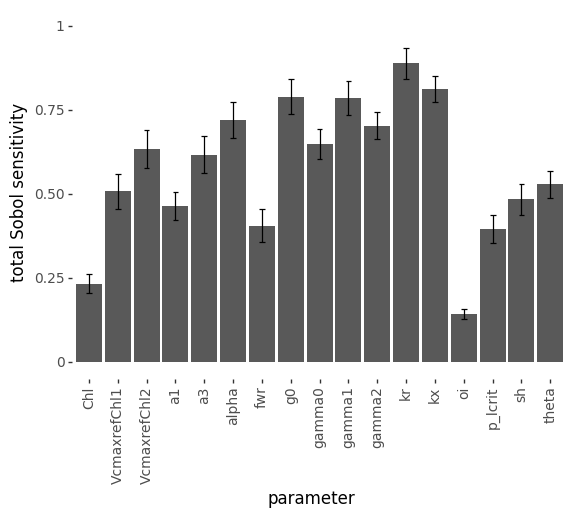

<ggplot: (8732988944409)>

In [19]:

addToName = repr(11)+"_"+repr(21)+"_"+"wet"
with open('sobolPhoto4/Siev_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
df
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv = dfmean
dfmeanEv


(
    ggplot(dfmeanEv)  # What data to use
    + aes(x='variables', y= "mean" )  # What variable to use
    + geom_bar(stat = "identity")  # Geometric object to use for drawing
    + xlab("parameter")
    + ylim(0,1)
    + geom_errorbar(aes(ymin="minst", ymax="maxst"), width=.2) 
    + ylab("total Sobol sensitivity")
    +theme(legend_text = element_text( size=10),
        legend_title = element_text( size=10),
        legend_position="bottom",#c(0.5,0.1),
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=10) ,
        axis_text_x =element_text(angle = 90, size=10) ,
        axis_text = element_text( size=10),
        axis_title = element_text( size=12)) 
)

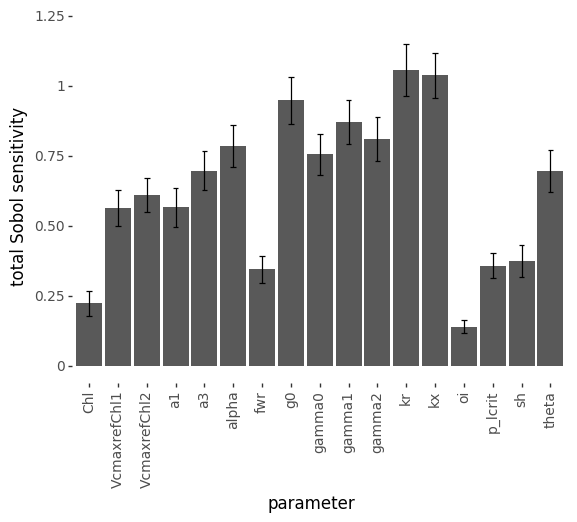

<ggplot: (8732988243056)>

In [30]:

addToName = repr(10)+"_"+repr(21)+"_"+"dry"
with open('sobolPhoto4/Siev_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
df
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv = dfmean
dfmeanEv


(
    ggplot(dfmeanEv)  # What data to use
    + aes(x='variables', y= "mean" )  # What variable to use
    + geom_bar(stat = "identity")  # Geometric object to use for drawing
    + xlab("parameter")
    + ylim(0,1.2)
    + geom_errorbar(aes(ymin="minst", ymax="maxst"), width=.2) 
    + ylab("total Sobol sensitivity")
    +theme(legend_text = element_text( size=10),
        legend_title = element_text( size=10),
        legend_position="bottom",#c(0.5,0.1),
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=10) ,
        axis_text_x =element_text(angle = 90, size=10) ,
        axis_text = element_text( size=10),
        axis_title = element_text( size=12)) 
)

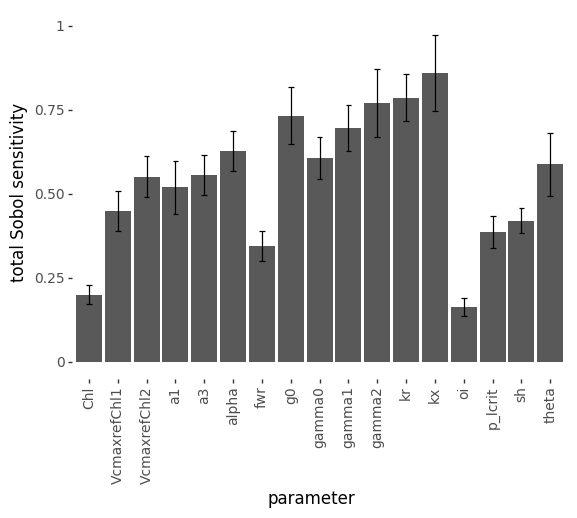

<ggplot: (8732988949011)>

In [20]:

addToName = repr(11)+"_"+repr(7)+"_"+"wet"
with open('sobolPhoto4/Siev_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv = dfmean
dfmeanEv


(
    ggplot(dfmeanEv)  # What data to use
    + aes(x='variables', y= "mean" )  # What variable to use
    + geom_bar(stat = "identity")  # Geometric object to use for drawing
    + xlab("parameter")
    + ylim(0,1)
    + geom_errorbar(aes(ymin="minst", ymax="maxst"), width=.2) 
    + ylab("total Sobol sensitivity")
    +theme(legend_text = element_text( size=10),
        legend_title = element_text( size=10),
        legend_position="bottom",#c(0.5,0.1),
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=10) ,
        axis_text_x =element_text(angle = 90, size=10) ,
        axis_text = element_text( size=10),
        axis_title = element_text( size=12)) 
)

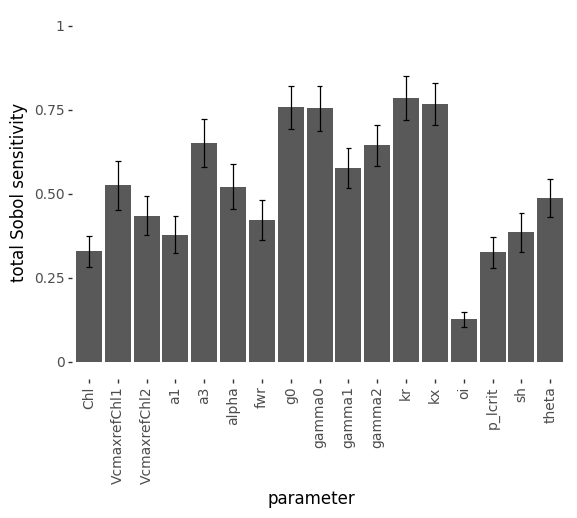

<ggplot: (8732988824977)>

In [22]:

addToName = repr(11)+"_"+repr(7)+"_"+"dry"
with open('sobolPhoto4/Siev_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv = dfmean
dfmeanEv


(
    ggplot(dfmeanEv)  # What data to use
    + aes(x='variables', y= "mean" )  # What variable to use
    + geom_bar(stat = "identity")  # Geometric object to use for drawing
    + xlab("parameter")
    +ylim(0,1)
    + geom_errorbar(aes(ymin="minst", ymax="maxst"), width=.2) 
    + ylab("total Sobol sensitivity")
    +theme(legend_text = element_text( size=10),
        legend_title = element_text( size=10),
        legend_position="bottom",#c(0.5,0.1),
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=10) ,
        axis_text_x =element_text(angle = 90, size=10) ,
        axis_text = element_text( size=10),
        axis_title = element_text( size=12)) 
)

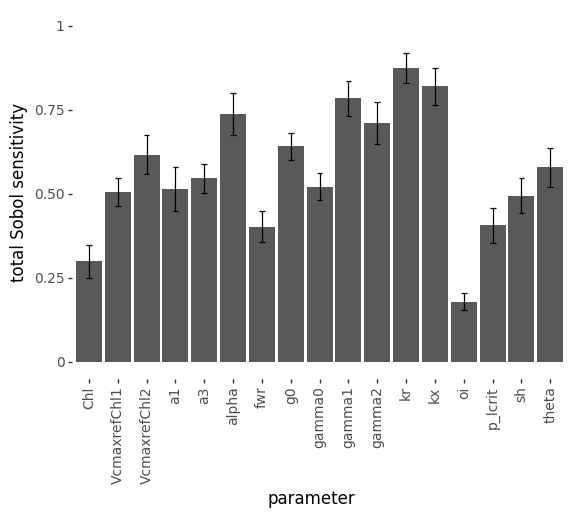

<ggplot: (8732988741006)>

In [24]:

addToName = repr(11)+"_"+repr(21)+"_"+"wet"
with open('sobolPhoto4/Siag_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv = dfmean
dfmeanEv


(
    ggplot(dfmeanEv)  # What data to use
    + aes(x='variables', y= "mean" )  # What variable to use
    + geom_bar(stat = "identity")  # Geometric object to use for drawing
    + xlab("parameter")
    + ylim(0,1)
    + geom_errorbar(aes(ymin="minst", ymax="maxst"), width=.2) 
    + ylab("total Sobol sensitivity")
    +theme(legend_text = element_text( size=10),
        legend_title = element_text( size=10),
        legend_position="bottom",#c(0.5,0.1),
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=10) ,
        axis_text_x =element_text(angle = 90, size=10) ,
        axis_text = element_text( size=10),
        axis_title = element_text( size=12)) 
)

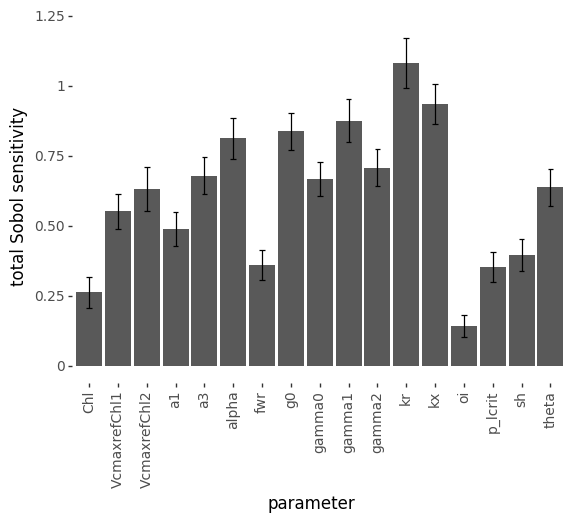

<ggplot: (8732988183673)>

In [31]:

addToName = repr(10)+"_"+repr(21)+"_"+"dry"
with open('sobolPhoto4/Siag_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
df
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv = dfmean
dfmeanEv


(
    ggplot(dfmeanEv)  # What data to use
    + aes(x='variables', y= "mean" )  # What variable to use
    + geom_bar(stat = "identity")  # Geometric object to use for drawing
    + xlab("parameter")
    + ylim(0,1.2)
    + geom_errorbar(aes(ymin="minst", ymax="maxst"), width=.2) 
    + ylab("total Sobol sensitivity")
    +theme(legend_text = element_text( size=10),
        legend_title = element_text( size=10),
        legend_position="bottom",#c(0.5,0.1),
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=10) ,
        axis_text_x =element_text(angle = 90, size=10) ,
        axis_text = element_text( size=10),
        axis_title = element_text( size=12)) 
)

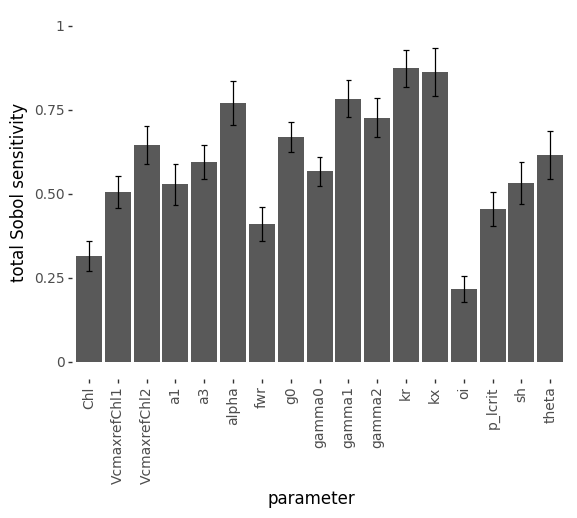

<ggplot: (8732988607922)>

In [25]:

addToName = repr(11)+"_"+repr(7)+"_"+"wet"
with open('sobolPhoto4/Siag_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv = dfmean
dfmeanEv


(
    ggplot(dfmeanEv)  # What data to use
    + aes(x='variables', y= "mean" )  # What variable to use
    + geom_bar(stat = "identity")  # Geometric object to use for drawing
    + xlab("parameter")
    + ylim(0,1)
    + geom_errorbar(aes(ymin="minst", ymax="maxst"), width=.2) 
    + ylab("total Sobol sensitivity")
    +theme(legend_text = element_text( size=10),
        legend_title = element_text( size=10),
        legend_position="bottom",#c(0.5,0.1),
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=10) ,
        axis_text_x =element_text(angle = 90, size=10) ,
        axis_text = element_text( size=10),
        axis_title = element_text( size=12)) 
)

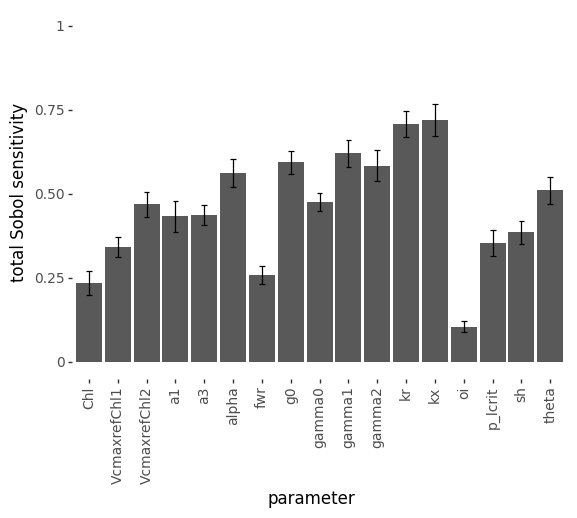

<ggplot: (8732988455584)>

In [27]:

addToName = repr(11)+"_"+repr(7)+"_"+"dry"
with open('sobolPhoto4/Siag_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv = dfmean
dfmeanEv


(
    ggplot(dfmeanEv)  # What data to use
    + aes(x='variables', y= "mean" )  # What variable to use
    + geom_bar(stat = "identity")  # Geometric object to use for drawing
    + xlab("parameter")
    + ylim(0,1)
    + geom_errorbar(aes(ymin="minst", ymax="maxst"), width=.2) 
    + ylab("total Sobol sensitivity")
    +theme(legend_text = element_text( size=10),
        legend_title = element_text( size=10),
        legend_position="bottom",#c(0.5,0.1),
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=10) ,
        axis_text_x =element_text(angle = 90, size=10) ,
        axis_text = element_text( size=10),
        axis_title = element_text( size=12)) 
)

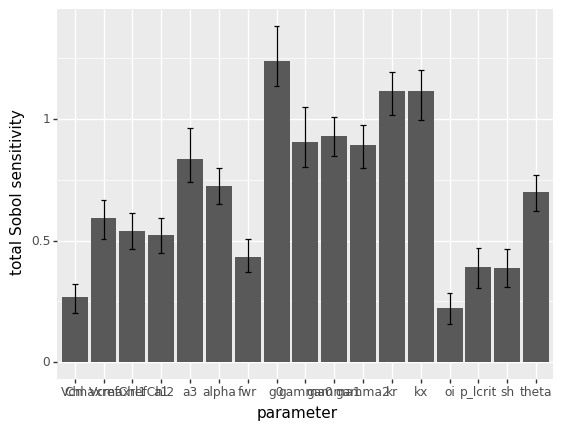

<ggplot: (8781413643677)>

In [108]:

(
    ggplot(dfmeanVj)  # What data to use
    + aes(x='variables', y= "mean" )  # What variable to use
    + geom_bar(stat = "identity")  # Geometric object to use for drawing
    + xlab("parameter")
    + geom_errorbar(aes(ymin="minst", ymax="maxst"), width=.2) 
    + ylab("total Sobol sensitivity")
)

In [109]:
Sic = np.array([np.full(17,0.) for i in range(maxrun)])
for i in range(maxrun):
    with open('Siev_'+repr(i)+'.pkl','rb') as f:
         Sic[i][:] = pickle.load(f)['ST_conf']
Sict = Sic.T
df_conf = pd.DataFrame(Sic, columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx']) 

dfmean = pd.DataFrame(data=df_mean.mean(),columns=["mean"])
dfmean["maxst"] = (df_mean + df_conf).max()
dfmean["minst"] = (df_mean - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv = dfmean

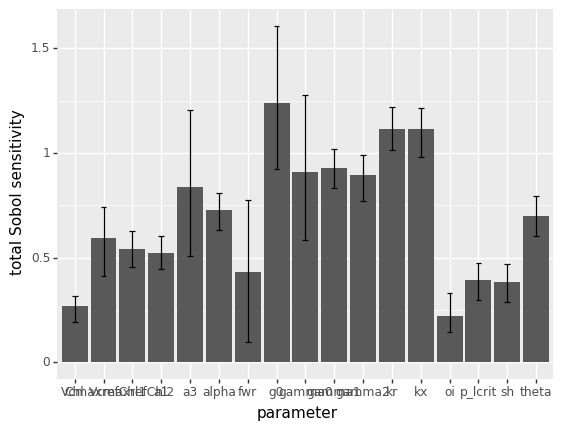

<ggplot: (8781414059427)>

In [110]:
(
    ggplot(dfmeanEv)  # What data to use
    + aes(x='variables', y= "mean" )  # What variable to use
    + geom_bar(stat = "identity")  # Geometric object to use for drawing
    + xlab("parameter")
    + geom_errorbar(aes(ymin="minst", ymax="maxst"), width=.2) 
    + ylab("total Sobol sensitivity")
)

In [111]:
Sic = np.array([np.full(17,0.) for i in range(maxrun)])
for i in range(maxrun):
    with open('Sij_'+repr(i)+'.pkl','rb') as f:
         Sic[i][:] = pickle.load(f)['ST_conf']
Sict = Sic.T
df_conf = pd.DataFrame(Sic, columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx']) 

dfmean = pd.DataFrame(data=df_mean.mean(),columns=["mean"])
dfmean["maxst"] = (df_mean + df_conf).max()
dfmean["minst"] = (df_mean - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanVc = dfmean

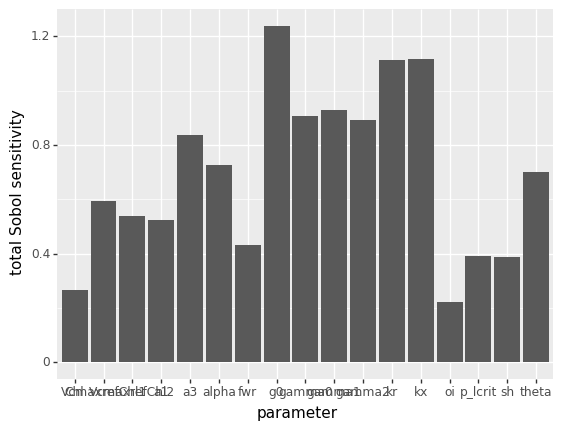

<ggplot: (8781414072823)>

In [113]:
(
    ggplot(dfmeanVc)  # What data to use
    + aes(x='variables', y= "mean" )  # What variable to use
    + geom_bar(stat = "identity")  # Geometric object to use for drawing
    + xlab("parameter")
    #+ geom_errorbar(aes(ymin="minst", ymax="maxst"), width=.2) 
    + ylab("total Sobol sensitivity")
)